<a href="https://colab.research.google.com/github/Firmank123/ML_SMT5/blob/main/2341720099_M_Firmansyah_JS4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [3]:
df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

print(X.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


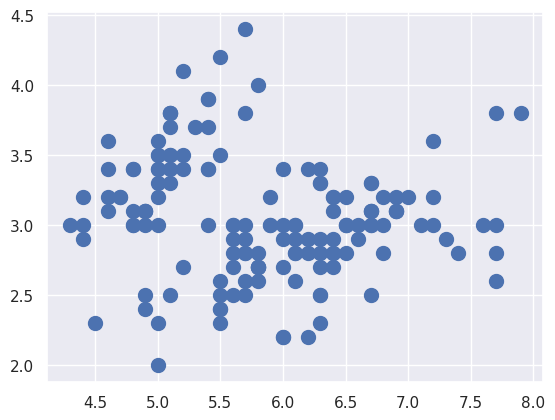

In [5]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)


In [6]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

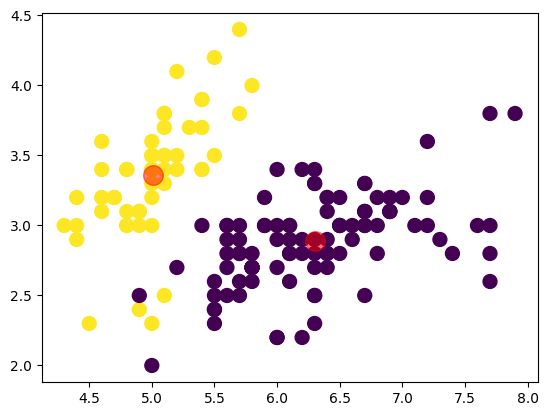

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [7]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


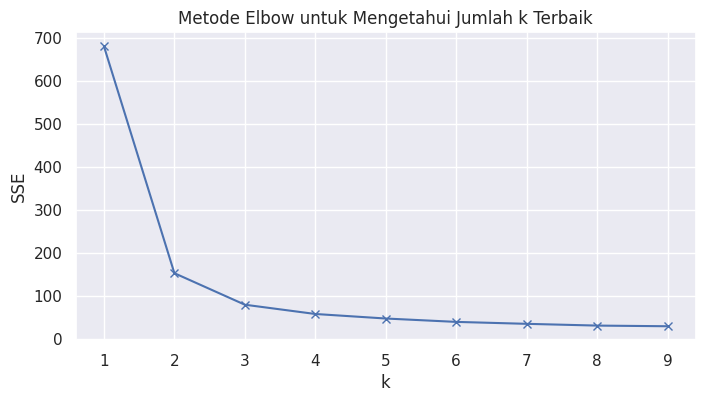

In [8]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()
# ```

In [9]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.34540931571815
k=5; SSE=46.80170193050192
k=6; SSE=38.94595367106238
k=7; SSE=34.42194766505635
k=8; SSE=30.33120654944683
k=9; SSE=28.78529538418238


Praktikum 2

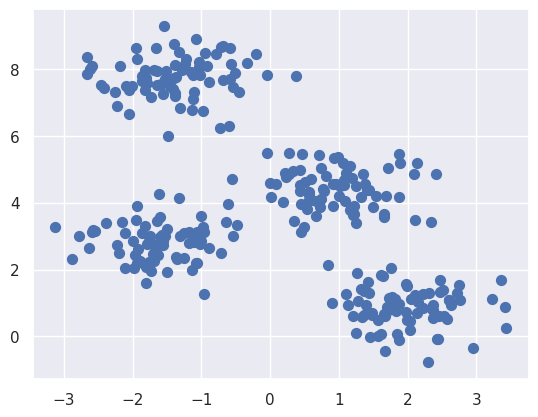

In [10]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

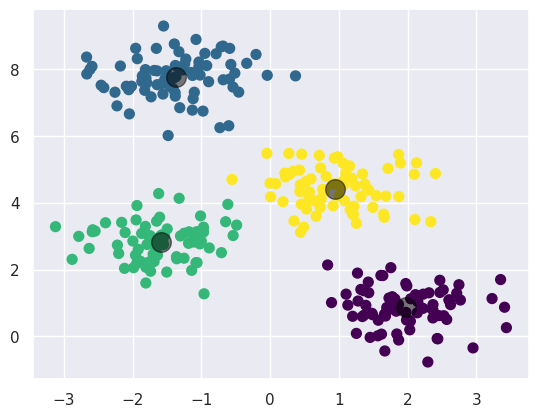

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

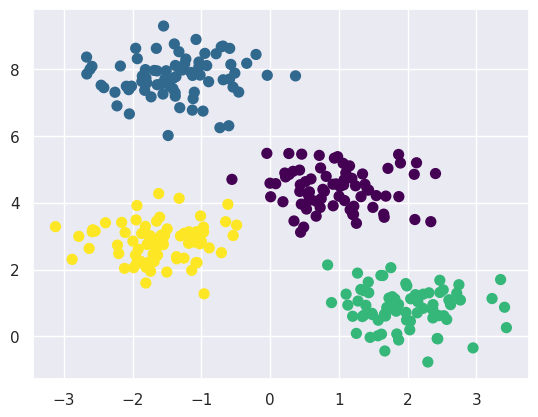

In [13]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

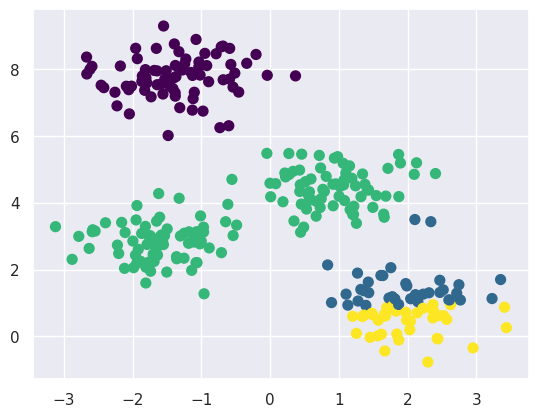

In [14]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

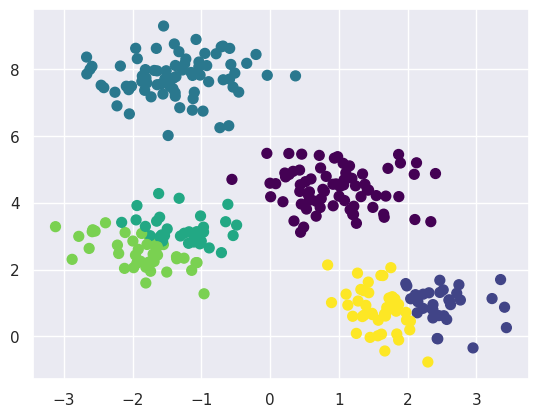

In [15]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

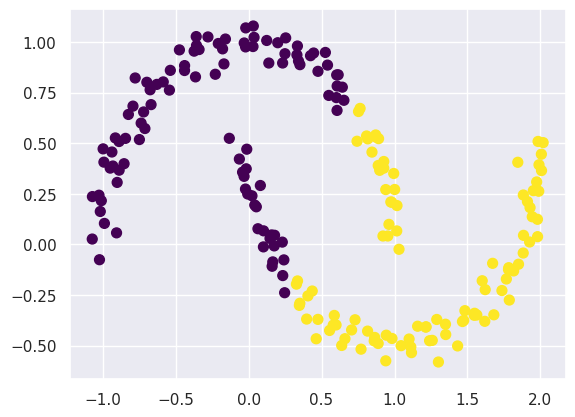

In [17]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


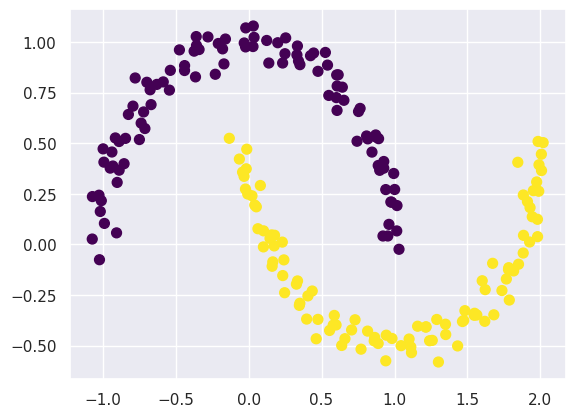

In [18]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [20]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

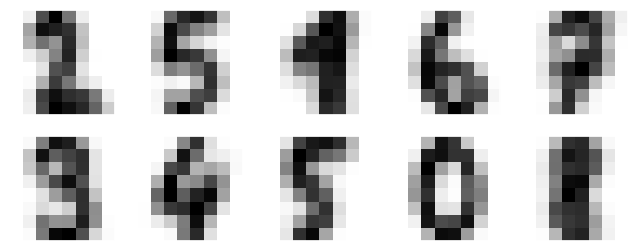

In [21]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [22]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

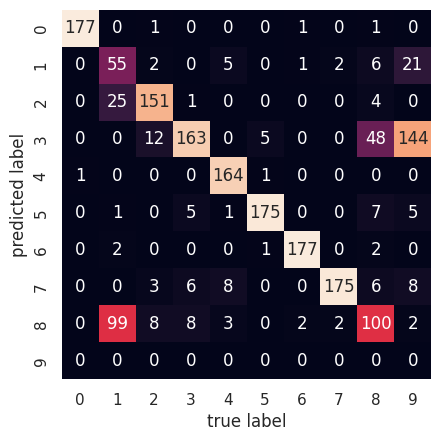

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [25]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

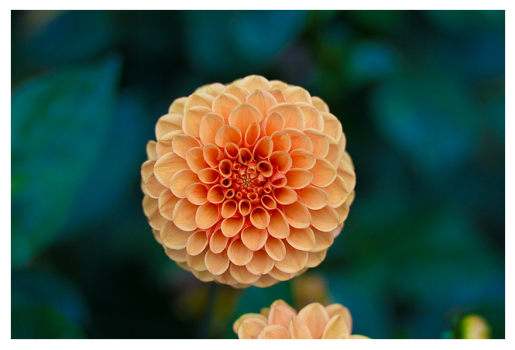

In [26]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [27]:
flower.shape

(427, 640, 3)

In [28]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [29]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

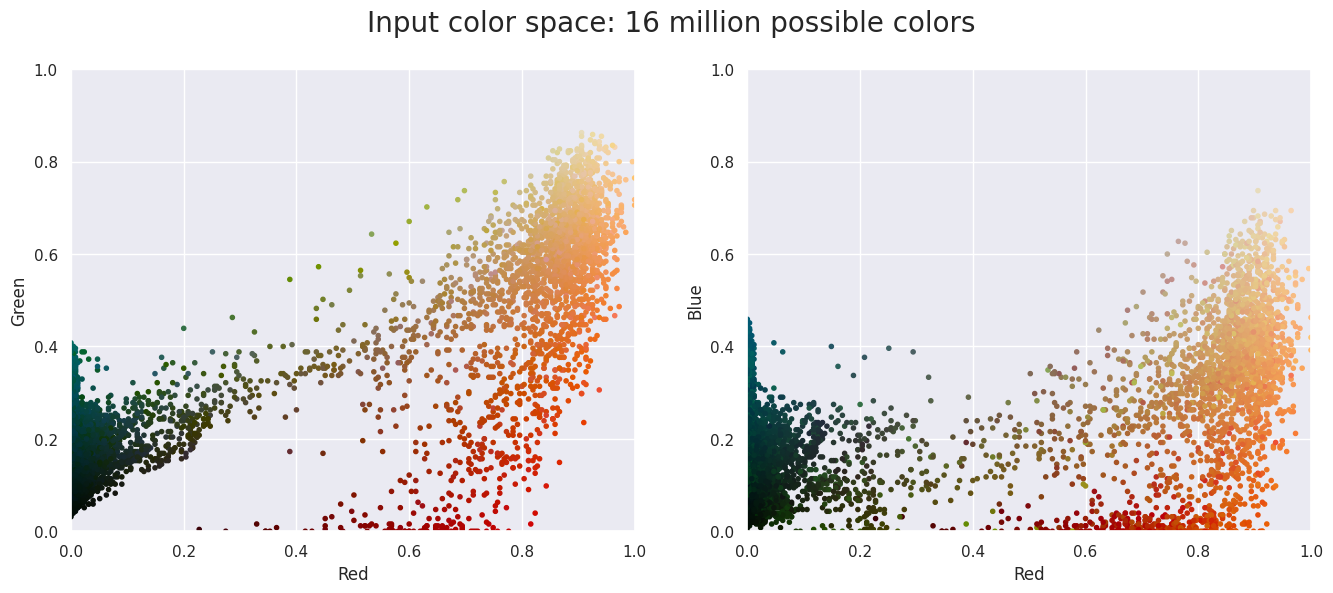

In [30]:
plot_pixels(data, title='Input color space: 16 million possible colors')

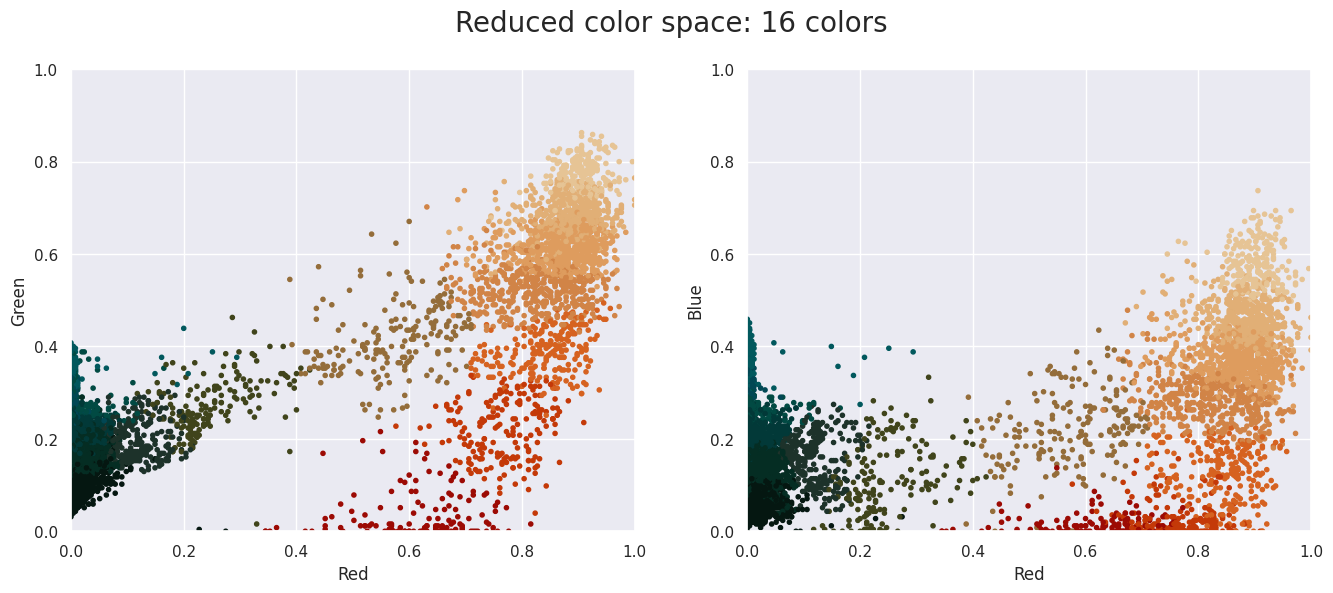

In [31]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

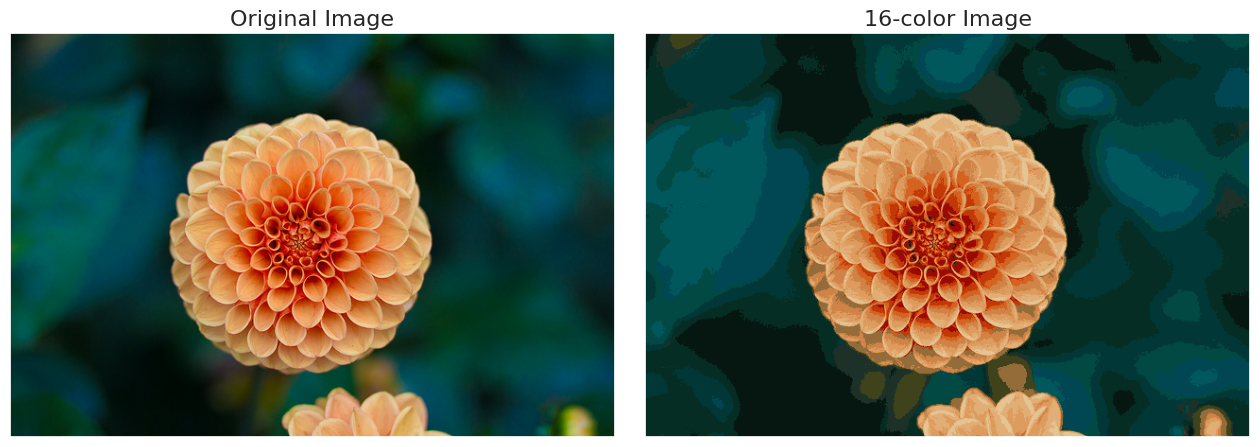

In [32]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

Praktikum 3

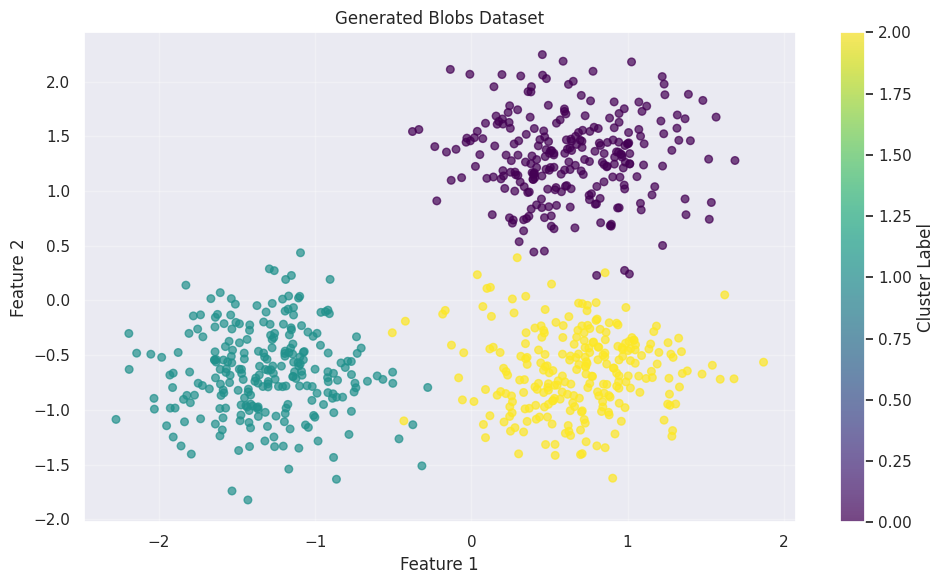

In [40]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create dataset with 3 centers
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap='viridis', s=30, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.title('Generated Blobs Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [42]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [46]:
# Evaluate clustering performance
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


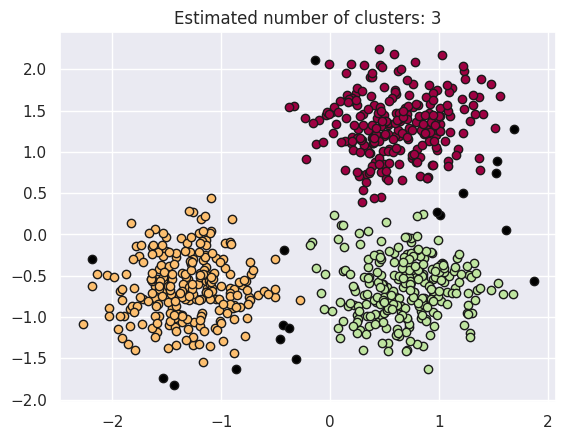

In [50]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=6
    )

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.show()

Tugas Praktikum

K-Means

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [68]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


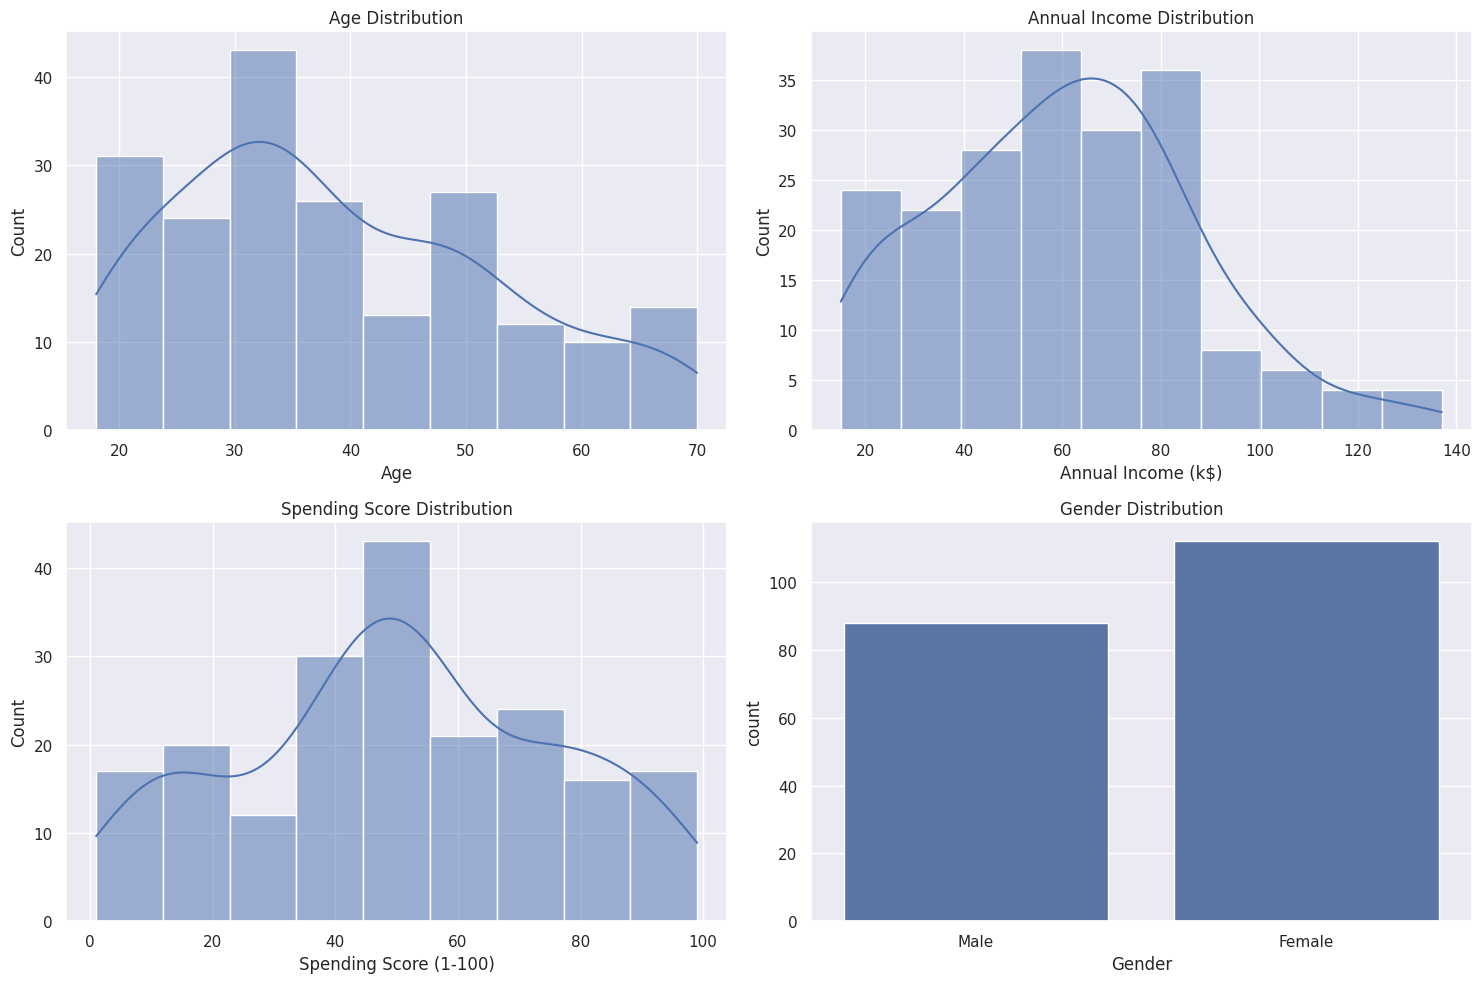

In [69]:
# Basic statistics about the data
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize feature distributions
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

In [70]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

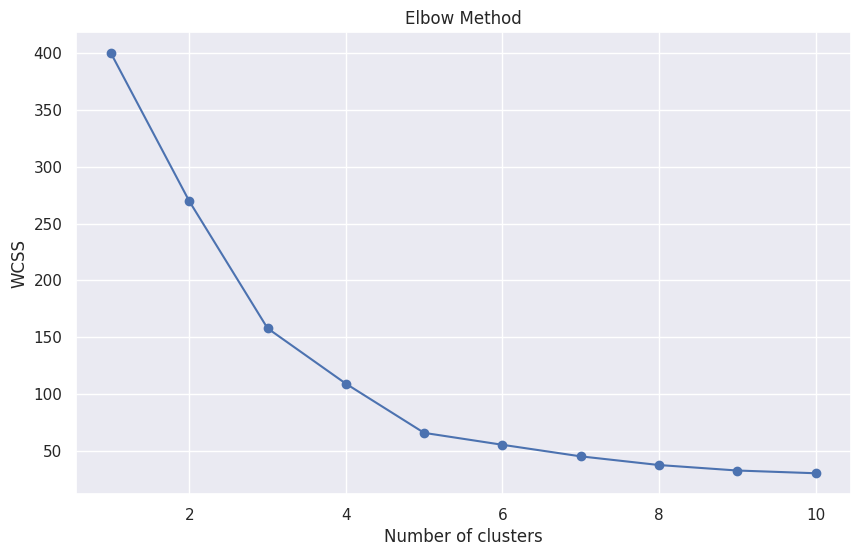

In [71]:
# Calculate WCSS (Within-Cluster Sum of Square) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

For n_clusters = 2, the silhouette score is 0.321
For n_clusters = 3, the silhouette score is 0.467
For n_clusters = 4, the silhouette score is 0.494
For n_clusters = 5, the silhouette score is 0.555
For n_clusters = 6, the silhouette score is 0.540
For n_clusters = 7, the silhouette score is 0.528
For n_clusters = 8, the silhouette score is 0.455
For n_clusters = 9, the silhouette score is 0.457
For n_clusters = 10, the silhouette score is 0.443


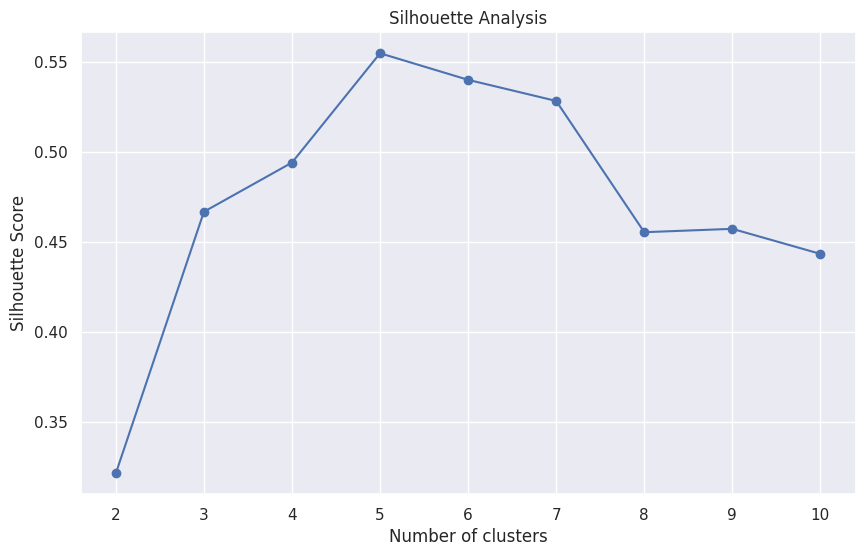

In [72]:
# Calculate silhouette scores for different values of k
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {i}, the silhouette score is {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [73]:
# Assuming k=5 is optimal based on the analysis above
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster information to the dataframe
df['Cluster'] = y_kmeans

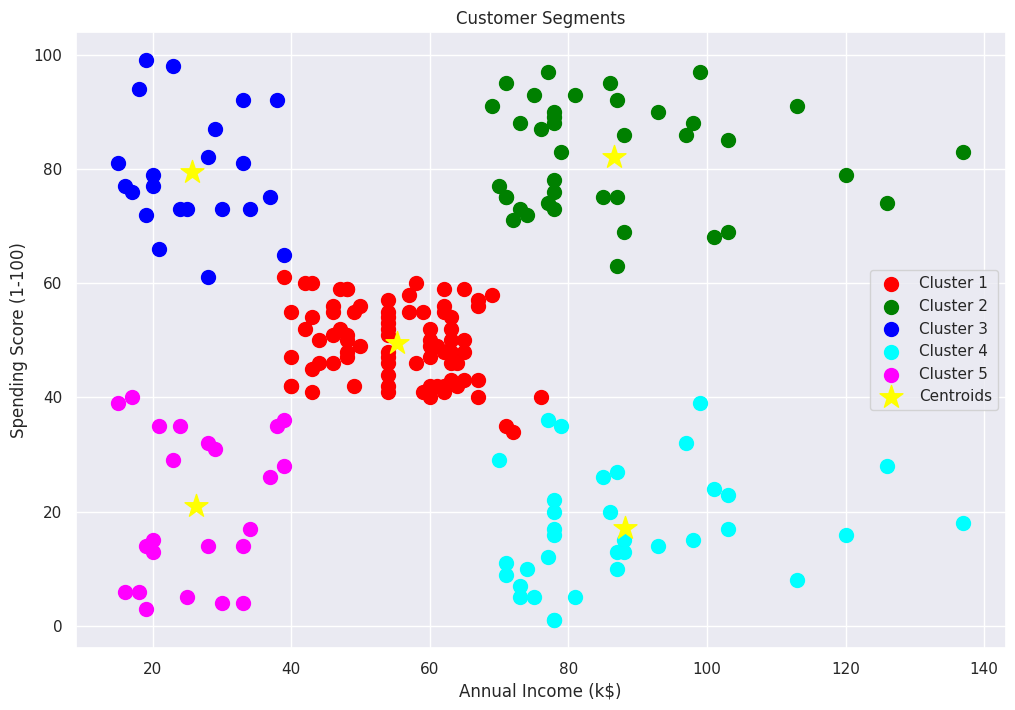

In [74]:
# Plot the clusters
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue', 'cyan', 'magenta']

for i in range(optimal_k):
    plt.scatter(df[df['Cluster'] == i]['Annual Income (k$)'],
                df[df['Cluster'] == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='*')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

Tugas DBSCAN




In [80]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

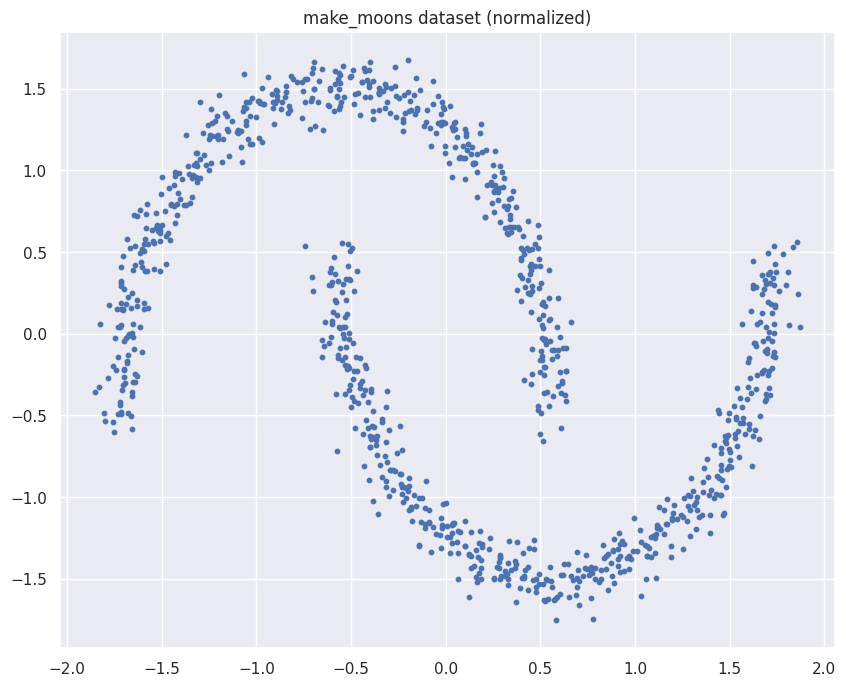

In [81]:
# 1. Create dataset and normalize
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

# Plot original dataset
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title('make_moons dataset (normalized)')
plt.show()

In [82]:
# 2. Apply DBSCAN
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Calculate number of clusters and noise points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

Estimated number of clusters: 2
Estimated number of noise points: 0


In [83]:
# 3. Evaluate with metrics
print(f"Homogeneity: {metrics.homogeneity_score(y_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.391


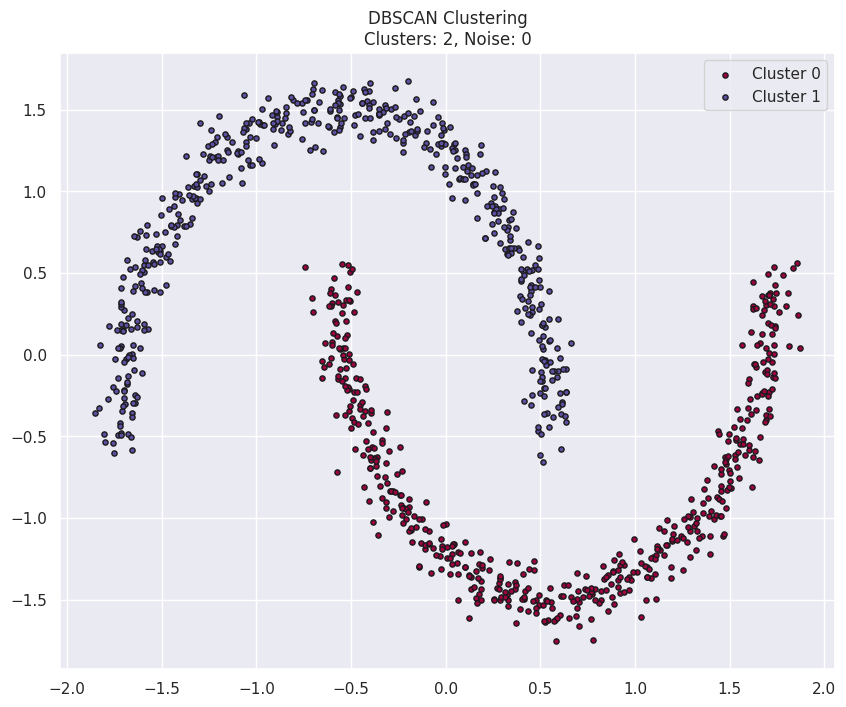

In [84]:
# 4. Visualize results
plt.figure(figsize=(10, 8))

# Create masks for core samples and different clusters
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Generate colors for the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Plot core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(
        xy[:, 0],
        xy[:, 1],
        s=14,
        c=[col],
        marker="o",
        edgecolors="k",
        label=f"Cluster {k}" if k != -1 else "Noise"
    )

    # Plot non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(
        xy[:, 0],
        xy[:, 1],
        s=6,
        c=[col],
        marker="o",
        edgecolors="k",
    )

plt.title(f"DBSCAN Clustering\nClusters: {n_clusters_}, Noise: {n_noise_}")
plt.legend()
plt.show()

In [86]:
# 5. Experimentation with Different Parameters
def run_dbscan_experiment(X, y_true, eps_values, min_samples_values):
    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            # Run DBSCAN
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            labels = db.labels_

            # Calculate metrics
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)

            # Skip if all points are noise or only one cluster
            if n_clusters <= 1:
                silhouette = "N/A (insufficient clusters)"
            else:
                silhouette = metrics.silhouette_score(X, labels)

            # Collect results
            result = {
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'homogeneity': metrics.homogeneity_score(y_true, labels),
                'completeness': metrics.completeness_score(y_true, labels),
                'v_measure': metrics.v_measure_score(y_true, labels),
                'ari': metrics.adjusted_rand_score(y_true, labels),
                'ami': metrics.adjusted_mutual_info_score(y_true, labels),
                'silhouette': silhouette if isinstance(silhouette, str) else f"{silhouette:.3f}"
            }

            results.append(result)
            print(f"eps={eps}, min_samples={min_samples}: {n_clusters} clusters, {n_noise} noise points")

    return results

# Define parameter values to test
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

# Run experiments
experiment_results = run_dbscan_experiment(X, y_true, eps_values, min_samples_values)

# Display results in a table
print("\nExperiment Results:")
print("-" * 100)
print(f"{'eps':<6} {'min_samples':<12} {'n_clusters':<12} {'n_noise':<10} {'homogeneity':<12} {'completeness':<12} {'v_measure':<10} {'ari':<8} {'ami':<8} {'silhouette':<10}")
print("-" * 100)

for result in experiment_results:
    print(f"{result['eps']:<6} {result['min_samples']:<12} {result['n_clusters']:<12} {result['n_noise']:<10} {result['homogeneity']:.3f}{' '*8} {result['completeness']:.3f}{' '*8} {result['v_measure']:.3f}{' '*6} {result['ari']:.3f}{' '*4} {result['ami']:.3f}{' '*4} {result['silhouette']}")

eps=0.05, min_samples=3: 69 clusters, 186 noise points
eps=0.05, min_samples=10: 3 clusters, 970 noise points
eps=0.05, min_samples=20: 0 clusters, 1000 noise points
eps=0.1, min_samples=3: 2 clusters, 14 noise points
eps=0.1, min_samples=10: 7 clusters, 57 noise points
eps=0.1, min_samples=20: 6 clusters, 850 noise points
eps=0.3, min_samples=3: 2 clusters, 0 noise points
eps=0.3, min_samples=10: 2 clusters, 0 noise points
eps=0.3, min_samples=20: 2 clusters, 0 noise points
eps=0.5, min_samples=3: 2 clusters, 0 noise points
eps=0.5, min_samples=10: 2 clusters, 0 noise points
eps=0.5, min_samples=20: 2 clusters, 0 noise points

Experiment Results:
----------------------------------------------------------------------------------------------------
eps    min_samples  n_clusters   n_noise    homogeneity  completeness v_measure  ari      ami      silhouette
----------------------------------------------------------------------------------------------------
0.05   3            69          